# Assignment: Housing Price

#### Importing libraries

In [97]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [98]:
house_price = pd.read_csv('train.csv')

In [99]:
house_price.shape

(1460, 81)

In [100]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

#### Checking for nulls in data set

In [103]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

#### Dropping columns that have more than 10% 

In [104]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [105]:
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Checkingfor missing values

In [106]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [107]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
480,2004,2005,2004.0,2006,6,5,6.0,4
1237,2004,2005,2004.0,2006,6,5,6.0,4
651,1940,1950,1940.0,2009,70,60,70.0,1
1117,1967,2003,1967.0,2008,43,7,43.0,2
544,2006,2006,2006.0,2006,4,4,4.0,4
356,1992,1992,1992.0,2009,18,18,18.0,1
956,1980,1980,1980.0,2009,30,30,30.0,1
1040,1957,2000,1957.0,2006,53,10,53.0,4
291,1912,2000,NaN,2008,98,10,NaN,2
1089,2005,2005,2005.0,2006,5,5,5.0,4


#### Drop unecessary columns


In [108]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing value

In [109]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [110]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

#### Dropping Id column

In [111]:
house_price = house_price.drop('Id',axis='columns')

In [112]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [113]:
# sns.boxplot(y = house_price['PoolArea'])
# house_price['WoodDeckSF'].value_counts()

#### Graphs to visualize data

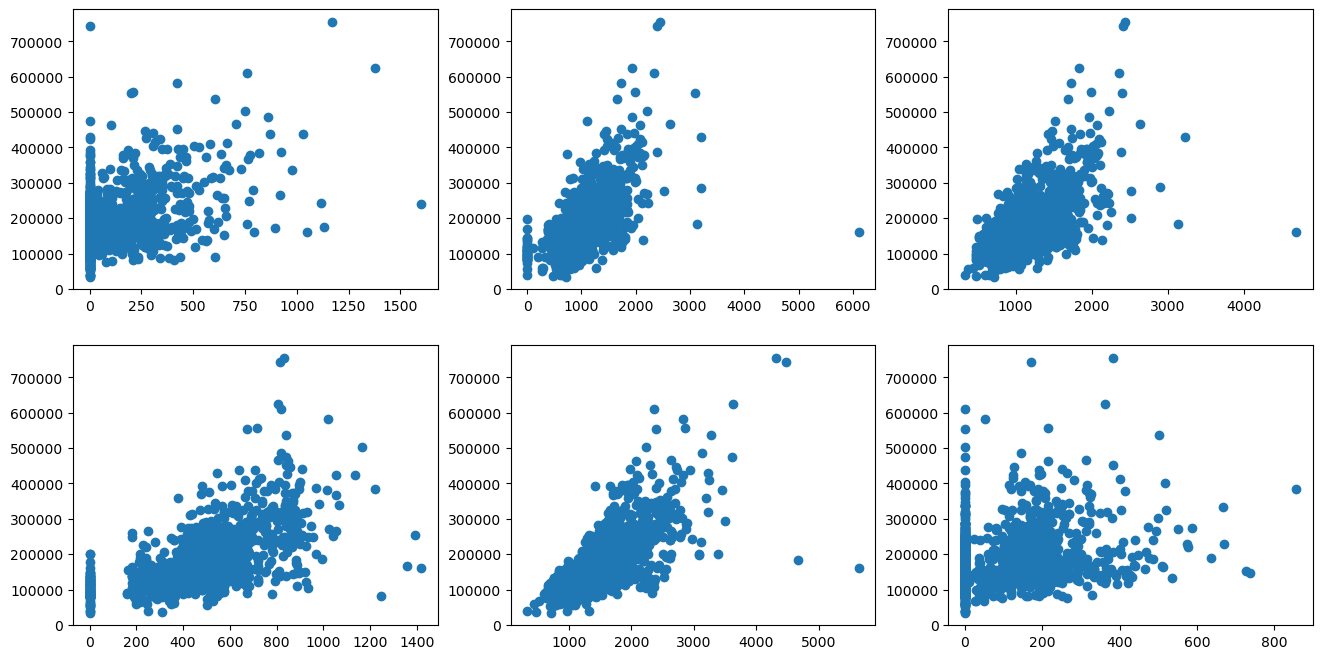

In [114]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

#### Heat map to understand co-relation between variables

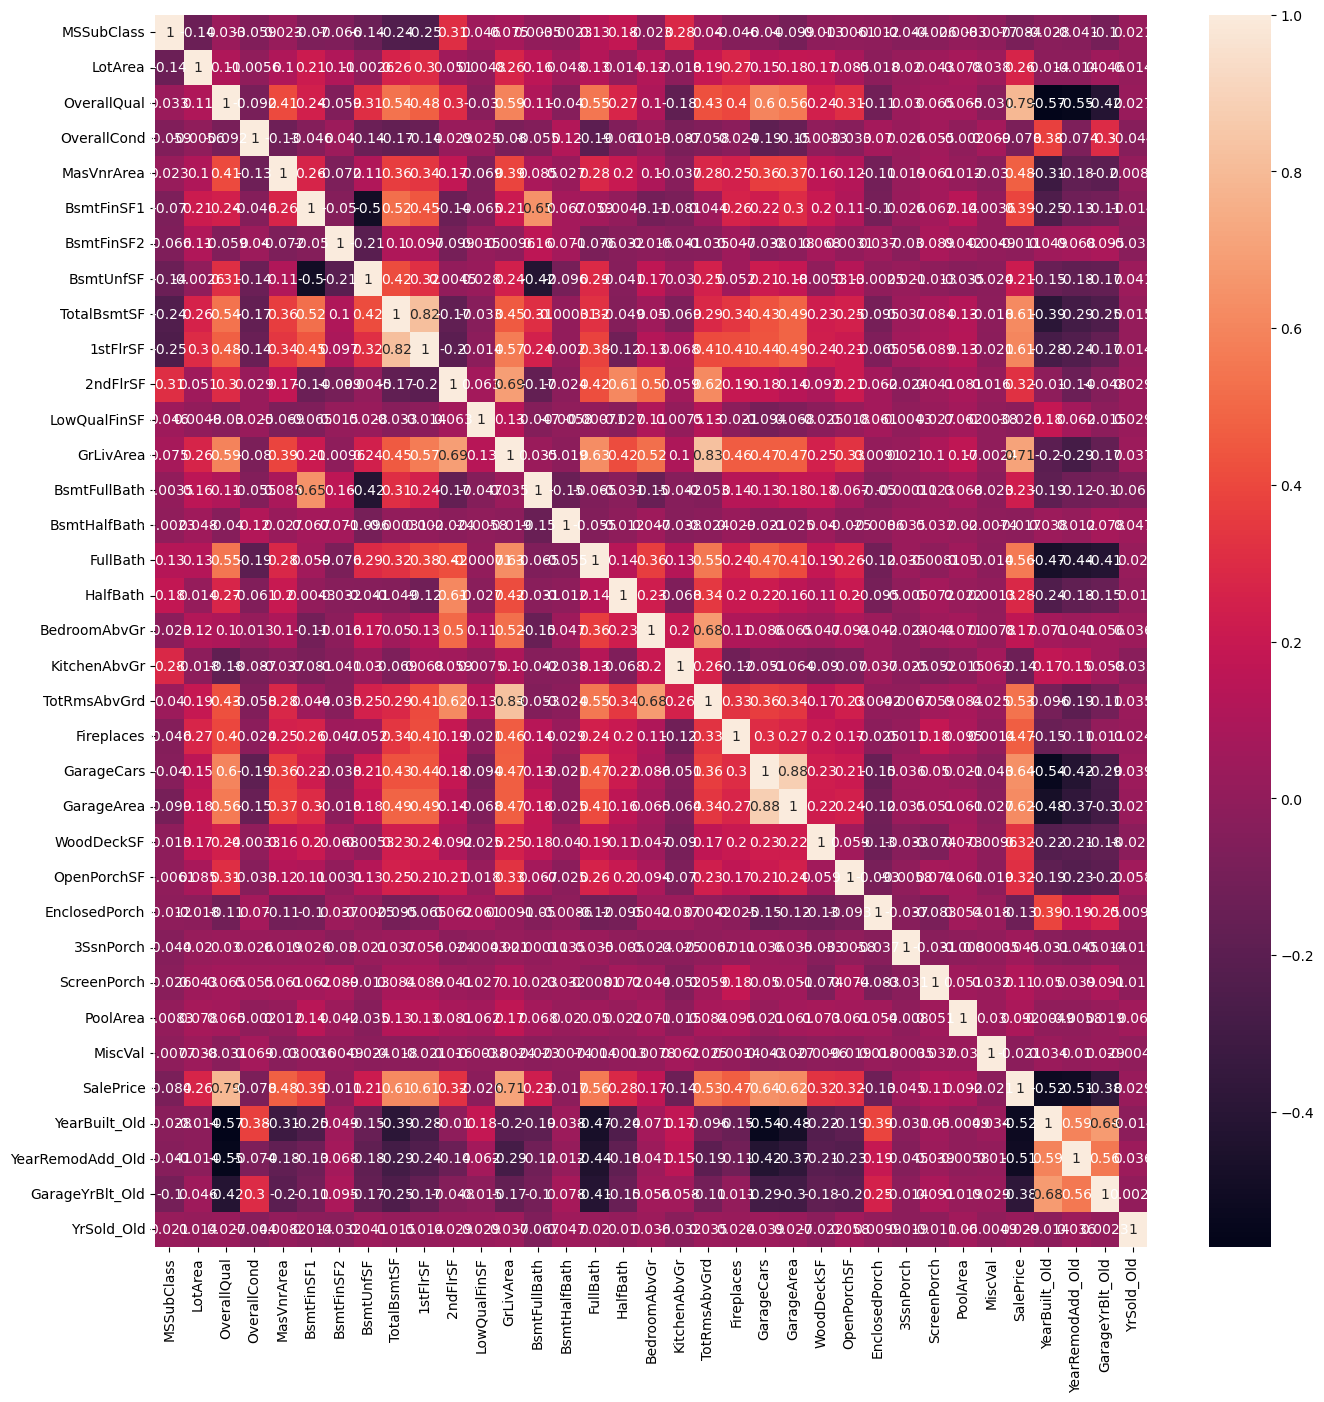

In [115]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### Taking care of outliers

In [116]:
house_price.shape

(1460, 71)

In [117]:
# outlier treatment. 

num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [118]:
house_price.shape

(1441, 71)

In [119]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [120]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [121]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Converted columns

In [122]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [123]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Dstribution

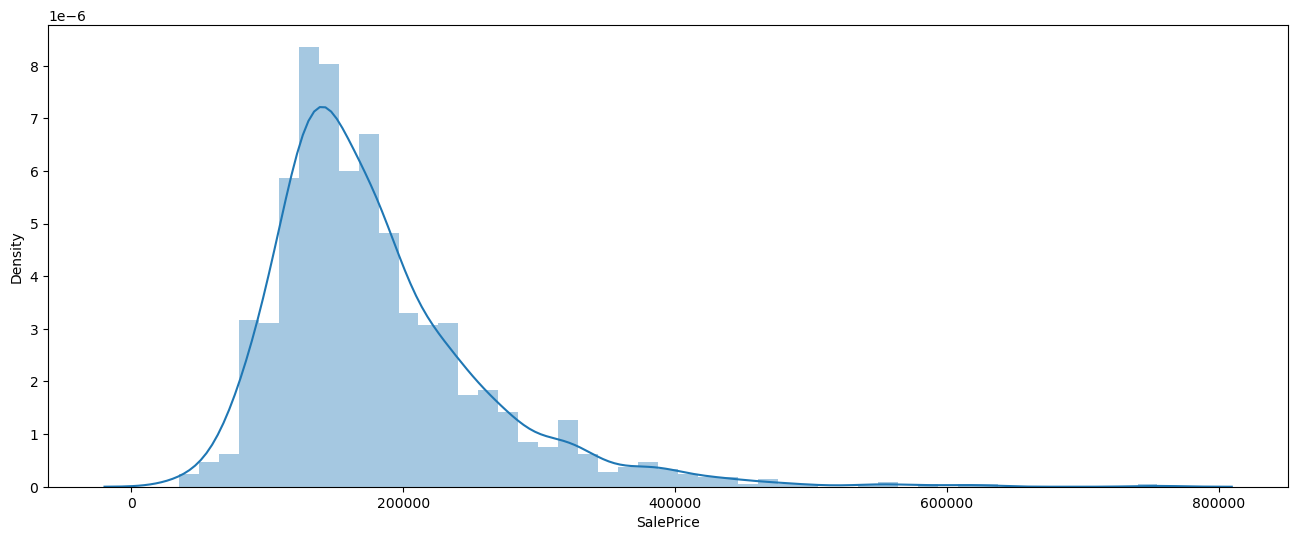

In [124]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

In [125]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [126]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset

In [127]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Checking the distribution again after scaling

<Axes: xlabel='SalePrice', ylabel='Density'>

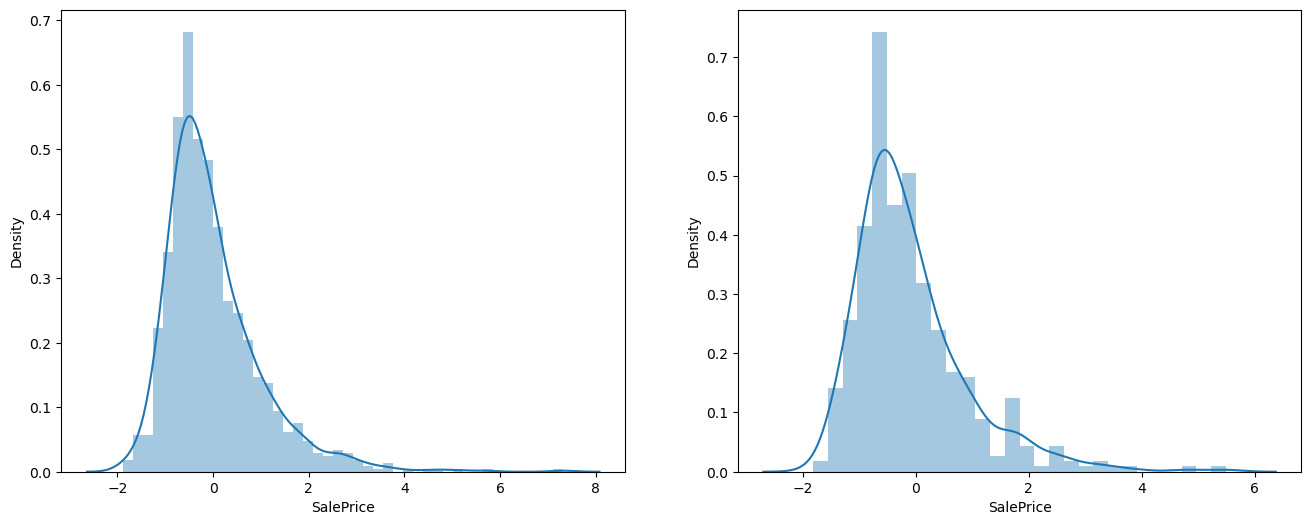

In [128]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [129]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [130]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using  RFE  lets try to to find the optimal number of feature

In [131]:
len(X_train.columns)

192

In [132]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [133]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [134]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [135]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lets try first with the Lasso regression model

In [136]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9104975771679272
0.8710319240921107


In [137]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.309),
 ('LotArea', 0.179),
 ('LotShape', 0.061),
 ('LandSlope', 0.099),
 ('OverallQual', 0.101),
 ('OverallCond', 0.074),
 ('MasVnrArea', 0.118),
 ('ExterQual', 0.032),
 ('ExterCond', -0.0),
 ('BsmtQual', 0.084),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.081),
 ('BsmtFinType1', -0.006),
 ('BsmtFinSF1', 0.295),
 ('BsmtFinType2', -0.059),
 ('BsmtFinSF2', -0.066),
 ('BsmtUnfSF', 0.115),
 ('TotalBsmtSF', 0.076),
 ('HeatingQC', 0.086),
 ('CentralAir', 0.032),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.11),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', -0.07),
 ('BsmtFullBath', 0.165),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.13),
 ('KitchenAbvGr', 0.242),
 ('KitchenQual', 0.308),
 ('TotRmsAbvGrd', 0.488),
 ('Fireplaces', 0.145),
 ('GarageFinish', 0.322),
 ('GarageCars', 0.087),
 ('GarageArea', -2.118),
 ('GarageQual', -0.186),
 ('GarageCond', -0.201),
 ('WoodDeckSF', 0.139),
 ('OpenPorchSF', -0.117),
 ('EnclosedPorch', -0.105),
 ('3SsnPorch'

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [138]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [139]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018302,0.007572,0.004114,0.005846,0.0001,{'alpha': 0.0001},0.844787,0.929320,0.795577,0.894550,0.924804,0.907596,0.924909,0.555710,0.905914,0.929886,0.861305,0.109830,1,0.920015,0.913345,0.924101,0.917517,0.914181,0.915613,0.913080,0.927067,0.915981,0.914076,0.917498,0.004548
1,0.021241,0.007645,0.000300,0.000900,0.0010,{'alpha': 0.001},0.845580,0.931317,0.835118,0.890718,0.924574,0.905173,0.918373,0.484961,0.905739,0.933288,0.857484,0.128269,2,0.914848,0.907458,0.917404,0.911951,0.908629,0.910498,0.908153,0.922061,0.910768,0.908786,0.912056,0.004466
2,0.006250,0.007654,0.001713,0.004659,0.0100,{'alpha': 0.01},0.810558,0.882410,0.841516,0.843573,0.890404,0.870066,0.890653,0.398568,0.882566,0.924041,0.823435,0.144805,3,0.864022,0.854816,0.860162,0.857395,0.855279,0.855482,0.854531,0.889644,0.858209,0.853721,0.860326,0.010212
3,0.003176,0.006226,0.003126,0.006251,0.0500,{'alpha': 0.05},0.790631,0.850148,0.819131,0.800638,0.858910,0.838172,0.862119,0.484069,0.870417,0.904516,0.807875,0.112619,4,0.832837,0.826627,0.827827,0.832324,0.826853,0.827944,0.824140,0.859147,0.827307,0.824877,0.830988,0.009753
4,0.002215,0.004666,0.003124,0.006249,0.1000,{'alpha': 0.1},0.741912,0.820299,0.775377,0.759602,0.818924,0.794388,0.822430,0.525062,0.839176,0.882154,0.777932,0.092694,5,0.801578,0.795929,0.793366,0.800900,0.795651,0.795937,0.789829,0.827002,0.796494,0.793102,0.798979,0.009906


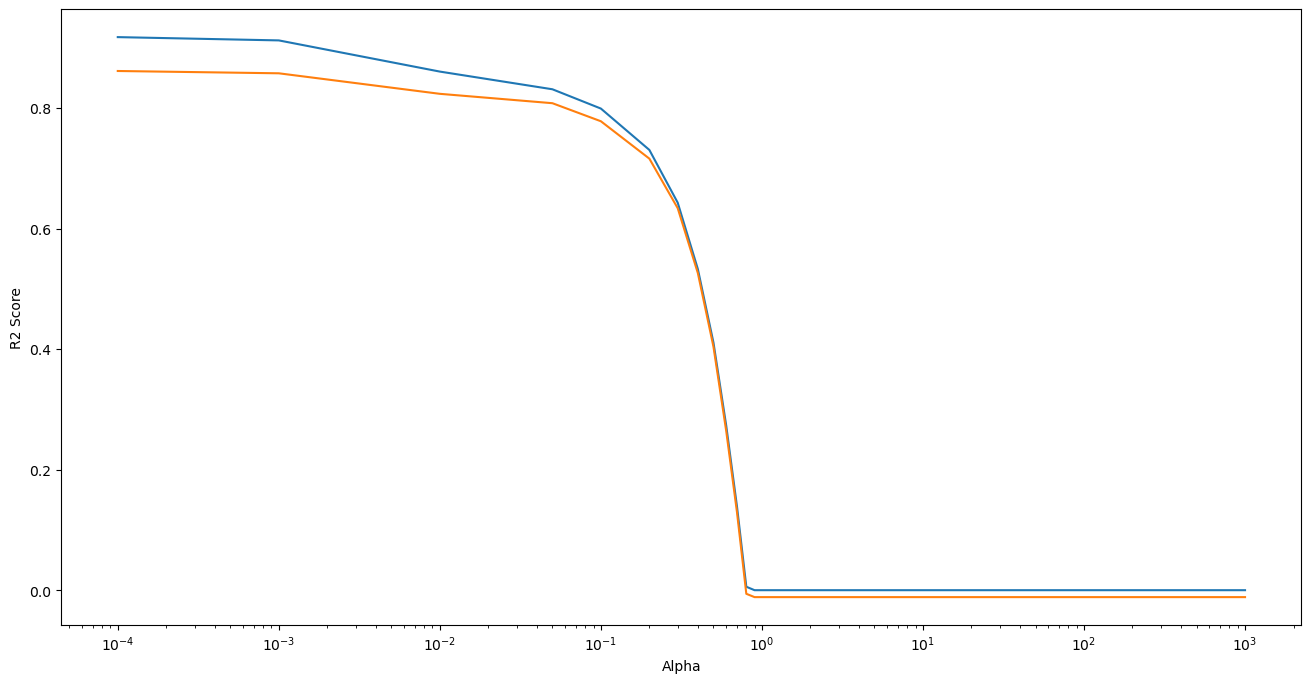

In [140]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [141]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [142]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9157603615948102
0.8600520899206916


In [143]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [144]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
48,YrSold_Old,1.738802
31,TotRmsAbvGrd,0.549784
67,Neighborhood_Gilbert,0.446391
33,GarageFinish,0.433118
68,Neighborhood_IDOTRR,0.428672
44,MiscVal,0.424286
21,2ndFlrSF,0.340261
30,KitchenQual,0.330301
19,CentralAir,0.318256
11,BsmtExposure,0.304119


In [161]:
lasso_double = Lasso(alpha=0.0002)
lasso_double.fit(X_train,y_train)

y_train_pred_double = lasso_double.predict(X_train)
y_test_pred_double = lasso_double.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred_double))
print(r2_score(y_true=y_test,y_pred=y_test_pred_double))

0.9151477620488928
0.8620854656833011


In [164]:
model_param = list(lasso_double.coef_)
model_param.insert(0,lasso_double.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef_double = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef_double.columns = ['Featuere','Coef']

In [165]:
lasso_coef_double.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
48,YrSold_Old,1.697017
31,TotRmsAbvGrd,0.541710
33,GarageFinish,0.412867
30,KitchenQual,0.327390
67,Neighborhood_Gilbert,0.326034
68,Neighborhood_IDOTRR,0.321861
11,BsmtExposure,0.293883
29,KitchenAbvGr,0.287118
21,2ndFlrSF,0.270080
44,MiscVal,0.270026


## Ridge regression

In [146]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9159831213527418
0.8576554969767952


#### Alpha value is not good for ridge and there could be a s sign of overfitting. We can see the difference in train and test data set

#### Using GridSearchCV

In [147]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [148]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004498,0.002374,0.004159,0.004159,0.0001,{'alpha': 0.0001},0.842846,0.928923,0.789788,0.894822,0.924340,0.909502,0.926039,0.569000,0.905397,0.929042,0.861970,0.106587,16,0.920216,0.913549,0.924308,0.917717,0.914376,0.915850,0.913291,0.927235,0.916178,0.914283,0.917700,0.004539
1,0.007802,0.007802,0.000051,0.000152,0.0010,{'alpha': 0.001},0.842896,0.928921,0.790092,0.894818,0.924341,0.909503,0.926038,0.568934,0.905409,0.929047,0.862000,0.106584,15,0.920216,0.913549,0.924308,0.917717,0.914376,0.915850,0.913291,0.927235,0.916178,0.914283,0.917700,0.004539
2,0.004655,0.005067,0.004166,0.005731,0.0100,{'alpha': 0.01},0.843377,0.928900,0.793075,0.894773,0.924354,0.909505,0.926030,0.568273,0.905531,0.929106,0.862292,0.106567,14,0.920215,0.913549,0.924304,0.917716,0.914375,0.915849,0.913290,0.927235,0.916177,0.914282,0.917699,0.004539
3,0.006290,0.006836,0.001562,0.004687,0.0500,{'alpha': 0.05},0.845117,0.928802,0.805158,0.894580,0.924410,0.909511,0.925981,0.565438,0.906040,0.929354,0.863439,0.106626,13,0.920190,0.913529,0.924220,0.917698,0.914356,0.915829,0.913270,0.927227,0.916157,0.914262,0.917674,0.004532
4,0.006251,0.007656,0.001602,0.004639,0.1000,{'alpha': 0.1},0.846649,0.928676,0.817944,0.894352,0.924473,0.909513,0.925900,0.562109,0.906612,0.929638,0.864586,0.106932,11,0.920121,0.913474,0.923991,0.917646,0.914303,0.915774,0.913215,0.927205,0.916100,0.914207,0.917604,0.004513


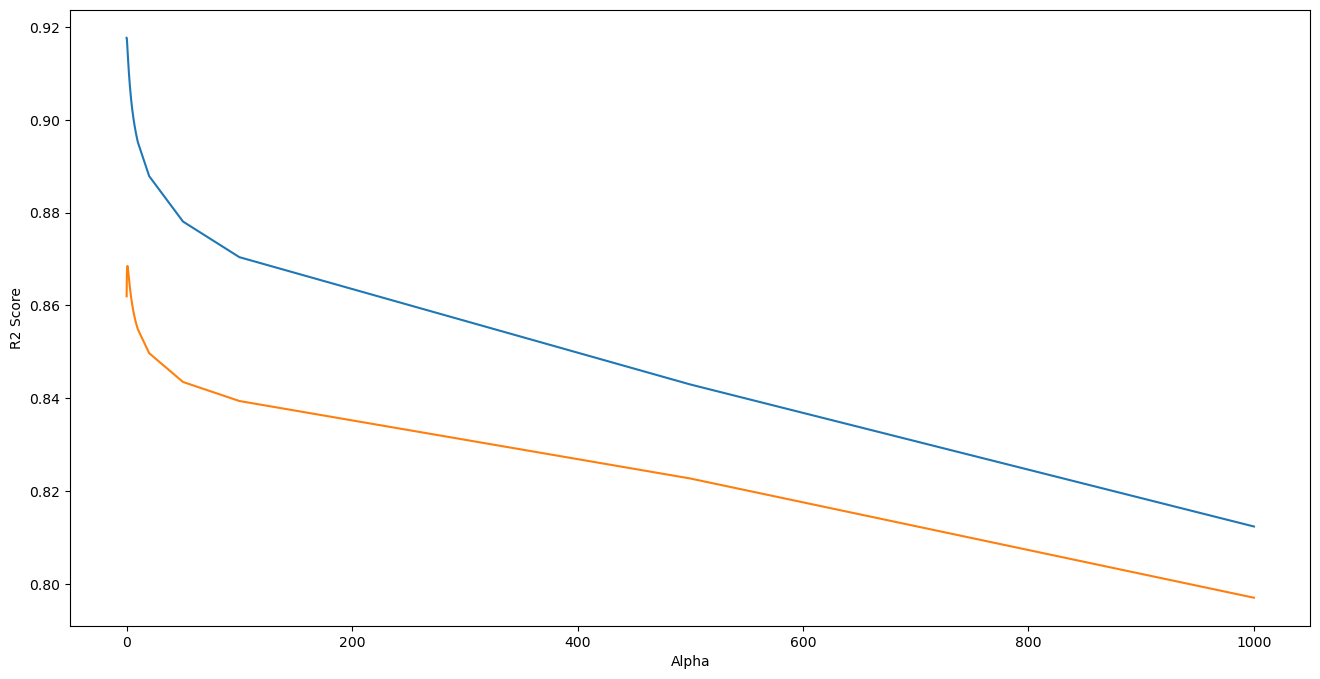

In [149]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

####  Model

In [150]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.7}

In [157]:
ridge = Ridge(alpha = 0.7)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9142199091198389
0.8654778195999688


In [158]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [159]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
48,YrSold_Old,1.479578
31,TotRmsAbvGrd,0.537216
33,GarageFinish,0.419822
67,Neighborhood_Gilbert,0.377627
30,KitchenQual,0.342210
68,Neighborhood_IDOTRR,0.304335
21,2ndFlrSF,0.292788
29,KitchenAbvGr,0.286926
44,MiscVal,0.281953
19,CentralAir,0.262592


## Conclusion:
### Using Ridge and Lasso we can see that the r2_scores are nearly the  same for both of them 

## Final Model

In [160]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9157603615948102
0.8600520899206916


 Lasso 0.0001

 Ridge  0.7

In [166]:
ridge_double = Ridge(alpha = 1.4)
ridge_double.fit(X_train,y_train)

y_pred_train_double = ridge_double.predict(X_train)
print(r2_score(y_train,y_pred_train_double))

y_pred_test_double = ridge_double.predict(X_test)
print(r2_score(y_test,y_pred_test_double))

0.9116316263422463
0.869784298408849


In [167]:
model_parameter_double = list(ridge_double.coef_)
model_parameter_double.insert(0,ridge_double.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef_double = pd.DataFrame(list(zip(cols,model_parameter_double)))
ridge_coef_double.columns = ['Feaure','Coef']

In [168]:
ridge_coef_double.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
48,YrSold_Old,1.264596
31,TotRmsAbvGrd,0.517219
33,GarageFinish,0.389861
30,KitchenQual,0.342352
67,Neighborhood_Gilbert,0.304537
29,KitchenAbvGr,0.275239
21,2ndFlrSF,0.234680
68,Neighborhood_IDOTRR,0.212173
60,Neighborhood_Blueste,0.199163
19,CentralAir,0.198257
